In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()




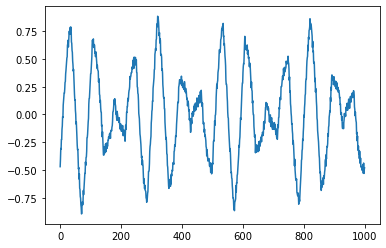

In [4]:
plt.plot(d1.transpose())

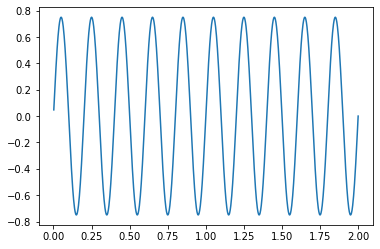

In [5]:
plt.plot(t, x)

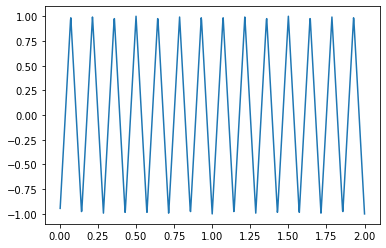

In [6]:
plt.plot(t, y)

In [7]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([d1[0], d2[0], d3[0], d4[0], d5[0]])
X

array([[-0.46949293, -0.40092414, -0.30602621, ..., -0.53052433,
        -0.4987835 , -0.47959473],
       [-0.1254079 , -0.04066951, -0.05580907, ..., -0.20428892,
        -0.15755593, -0.15469911],
       [-0.69415154, -0.61316862, -0.50575429, ..., -0.66620584,
        -0.63132454, -0.6857275 ],
       [ 0.46044462,  0.47418015,  0.40188578, ...,  0.43024849,
         0.39434514,  0.45252148],
       [ 0.05261841, -0.21216899,  0.22652964, ..., -0.0615606 ,
        -0.09748336,  0.21589276]])

In [8]:
U,S,V = np.linalg.svd(X)
S

array([20.9072295 , 14.1960597 ,  5.39459138,  1.40570512,  0.96313197])

In [9]:
eigen = S**2
eigen

array([437.11224517, 201.52811087,  29.10161617,   1.97600688,
         0.92762319])

In [10]:
eigen

array([437.11224517, 201.52811087,  29.10161617,   1.97600688,
         0.92762319])

In [11]:
for i in range(5):
    V[:,i] = V[:,i] * np.sqrt(eigen[i])



In [12]:
eigen = eigen/N
eigen = eigen/sum(eigen)

In [13]:
eigen

array([0.65177829, 0.30049867, 0.04339343, 0.00294642, 0.00138318])

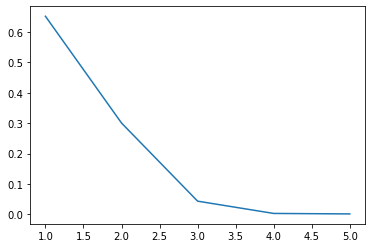

In [14]:
plt.plot(range(1,6), eigen)

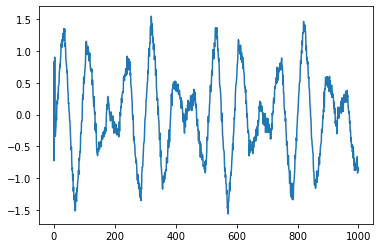

In [15]:

plt.plot(V[:,0])
plt.show()

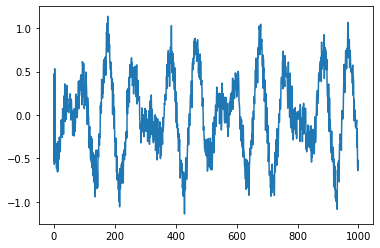

In [16]:
plt.plot(V[:,1])
plt.show()

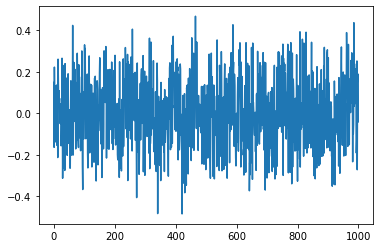

In [17]:
plt.plot(V[:,2])
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.4)

(1.5, 4.9)

([], [])

([], [])

Text(0.5, 0.92, 'First three PCA directions')

Text(0.5, 0, '1st eigenvector')

[Text(-4.0, 0, ''),
 Text(-3.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, '')]

Text(0.5, 0, '2nd eigenvector')

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, '')]

Text(0.5, 0, '3rd eigenvector')

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

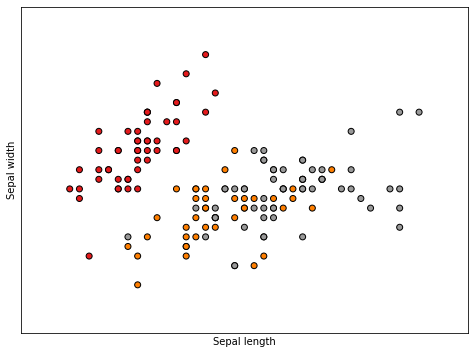

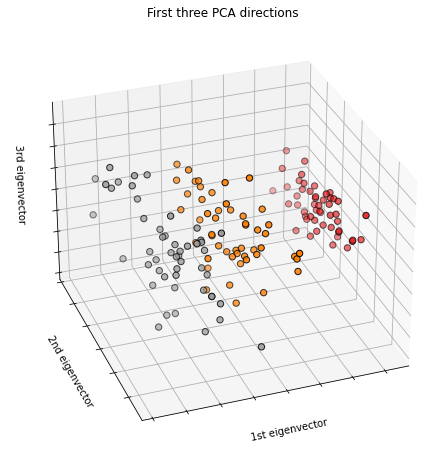

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
iris = datasets.load_iris()
X = iris.data[:50,:] 

In [22]:
X2 = X +0.05*np.random.rand(50,4)

In [23]:
X_combined = np.zeros((50,8))

In [24]:
X_combined[:,0:4] = X
X_combined[:,4:] = X2

In [25]:
X_combined

array([[5.1       , 3.5       , 1.4       , 0.2       , 5.13538578,
        3.5481431 , 1.43167028, 0.23231967],
       [4.9       , 3.        , 1.4       , 0.2       , 4.92061841,
        3.02675884, 1.43466321, 0.20180493],
       [4.7       , 3.2       , 1.3       , 0.2       , 4.7084824 ,
        3.2131362 , 1.32943335, 0.20818131],
       [4.6       , 3.1       , 1.5       , 0.2       , 4.61392909,
        3.13545526, 1.53333684, 0.23702944],
       [5.        , 3.6       , 1.4       , 0.2       , 5.00109094,
        3.62883339, 1.4471662 , 0.20154363],
       [5.4       , 3.9       , 1.7       , 0.4       , 5.44231889,
        3.92748473, 1.71792558, 0.40547687],
       [4.6       , 3.4       , 1.4       , 0.3       , 4.64264479,
        3.44485968, 1.427611  , 0.33848449],
       [5.        , 3.4       , 1.5       , 0.2       , 5.03869685,
        3.43671896, 1.51072088, 0.2290617 ],
       [4.4       , 2.9       , 1.4       , 0.2       , 4.44045846,
        2.92985096, 1.437794

In [26]:
X_combined.mean(axis=0)

array([5.006     , 3.428     , 1.462     , 0.246     , 5.0313913 ,
       3.45347165, 1.48693806, 0.27142192])

In [27]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_combined)
X_scaled  

array([[ 0.26938189,  0.19186974, -0.36063582, -0.44092382,  0.2966216 ,
         0.25262708, -0.32118174, -0.37161512],
       [-0.30377107, -1.14055903, -0.36063582, -0.44092382, -0.3159555 ,
        -1.13866661, -0.30378875, -0.66161735],
       [-0.87692403, -0.60758752, -0.9423065 , -0.44092382, -0.92102726,
        -0.64132585, -0.91531882, -0.60101832],
       [-1.16350052, -0.87407328,  0.22103486, -0.44092382, -1.19071996,
        -0.84861444,  0.26964064, -0.32685503],
       [-0.01719459,  0.4583555 , -0.36063582, -0.44092382, -0.08642516,
         0.46794601, -0.23112916, -0.66410074],
       [ 1.12911134,  1.25781276,  1.38437621,  1.47613628,  1.1720814 ,
         1.26488555,  1.34235487,  1.27401508],
       [-1.16350052, -0.07461601, -0.36063582,  0.51760623, -1.10881468,
        -0.02298073, -0.34477176,  0.63734109],
       [-0.01719459, -0.07461601,  0.22103486, -0.44092382,  0.02083751,
        -0.04470392,  0.13821082, -0.40257787],
       [-1.73665348, -1.40704478

In [28]:
X_scaled.mean(axis=0)

array([ 1.87003191e-15, -2.20823360e-15, -1.17128529e-15,  9.17044218e-16,
        1.41511802e-15, -3.05200309e-15, -2.77555756e-17, -1.12132525e-16])

In [29]:
U,S,V = np.linalg.svd(X_scaled)
S

array([14.32004707, 10.09662055,  8.18526294,  5.02645509,  0.70417804,
        0.40384697,  0.20715842,  0.16985735])

In [30]:
eigen = S**2
eigen

array([2.05063748e+02, 1.01941747e+02, 6.69985294e+01, 2.52652508e+01,
       4.95866714e-01, 1.63092379e-01, 4.29146121e-02, 2.88515180e-02])

In [31]:
eigen = eigen/50
eigen = eigen/sum(eigen)

In [34]:
eigen = np.round(eigen*100)/100
print(eigen)

[0.51 0.25 0.17 0.06 0.   0.   0.   0.  ]


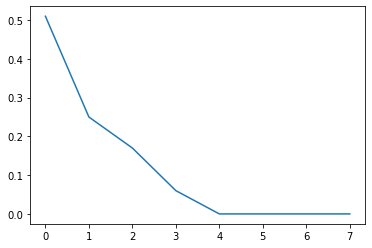

In [33]:
plt.plot(eigen)

In [31]:
X_reduced = PCA(n_components=3).fit_transform(X_scaled)

<IPython.core.display.Javascript object>


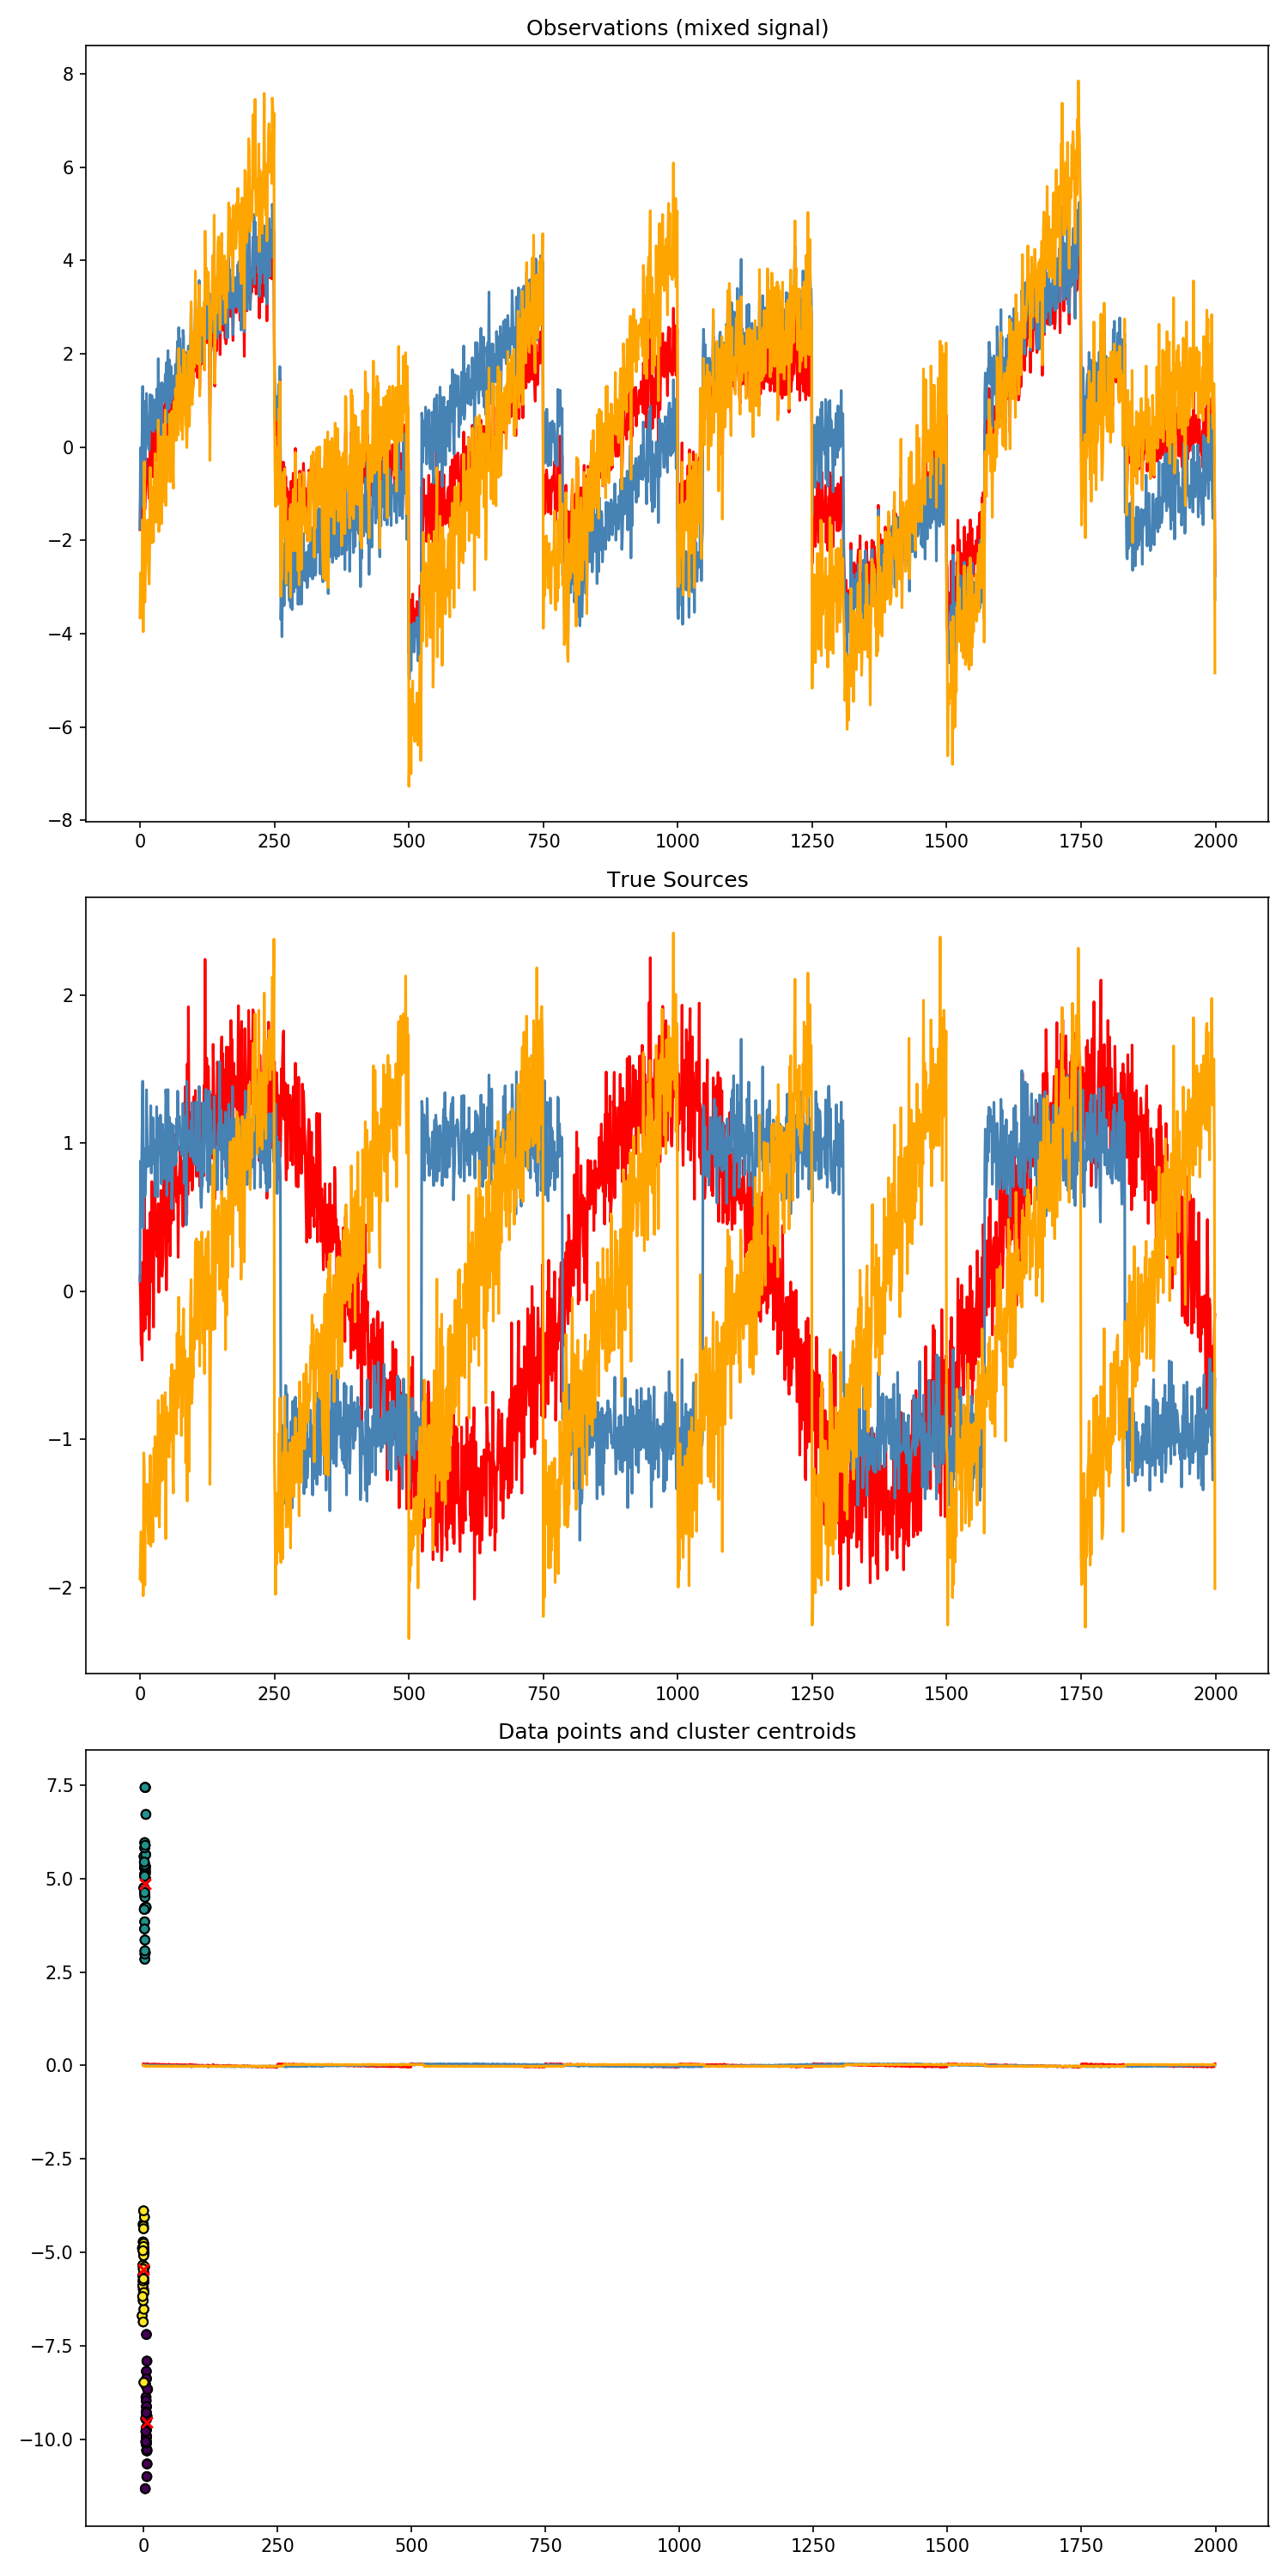

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed = 0
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# #############################################################################
# Plot results

plt.figure(figsize=(10,20))

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',]
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()
plt.show()

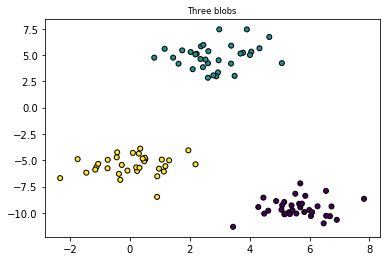

In [55]:
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
from sklearn.datasets import make_blobs
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

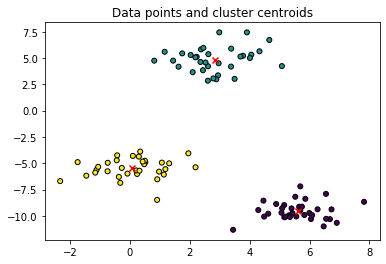

In [59]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
# Get the cluster centroids

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [35]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [36]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
# http://www.cse.psu.edu/~rtc12/CSE486/lecture15.pdf
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [37]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
print(data.DESCR)
data.target_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

array(['malignant', 'benign'], dtype='<U9')

In [65]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy


LogisticRegression(random_state=0)

0.958041958041958

In [43]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[50,  3],
       [ 3, 87]], dtype=int64)

In [44]:
Y_pred
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [45]:

results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[49,  4],
       [ 5, 85]], dtype=int64)

In [71]:
print(accuracy)

0.9370629370629371


In [70]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[52,  1],
       [ 5, 85]], dtype=int64)

In [73]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [74]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[45,  8],
       [ 1, 89]], dtype=int64)

In [75]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        53
           1       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [76]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[48,  5],
       [ 4, 86]], dtype=int64)

In [77]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[51,  2],
       [ 4, 86]], dtype=int64)

In [79]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

from sklearn.metrics import fbeta_score
output = fbeta_score(Y_test, Y_pred, average='macro', beta=0.5)
output

0.9682719241542771

In [81]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [186]:
# https://datascience-enthusiast.com/Python/ROC_Precision-Recall.html

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [53]:
from sklearn.datasets import make_classification 
X, Y = make_classification(n_samples=100, n_features=4, weights = [0.90, 0.1], random_state=0)

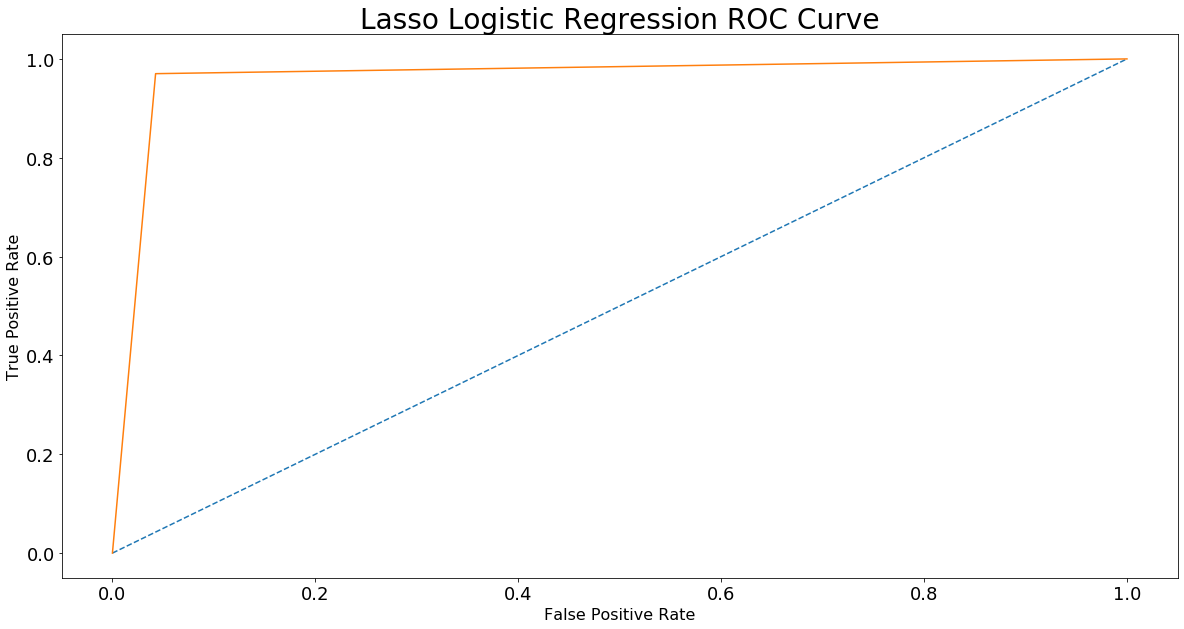

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression ROC Curve', fontsize = 28)
plt.show();

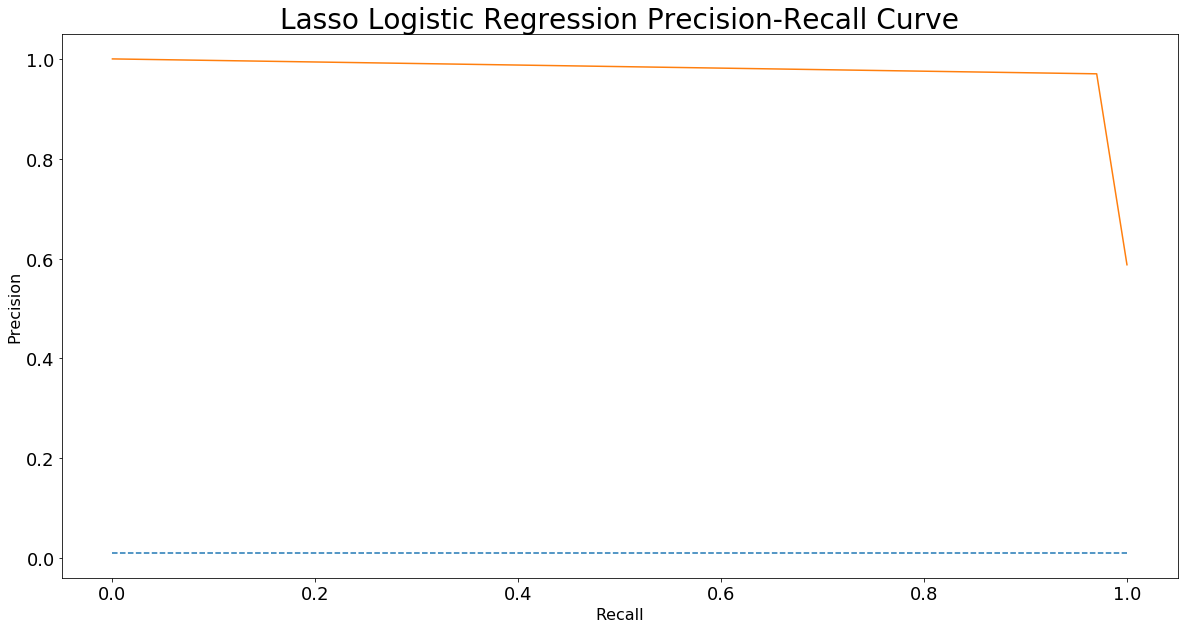

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0.01/0.98, 0.01/0.98], linestyle = '--')
plt.plot(recall, precision)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression Precision-Recall Curve', fontsize = 28)
plt.show();